In [67]:
import os
import re
import cv2
import aocd
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
from aocd import submit
from shapely import Polygon

#Part 1
data = aocd.get_data(day=18, year=2023).split('\n')

52979
53300


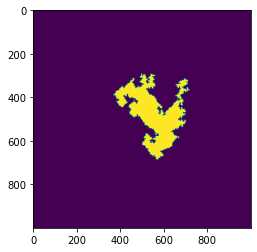

In [73]:
def _add(a,b):
    return (a[0] + b[0], a[1] + b[1])
def multiply_scalar(a,B):
    return (a[0] *B, a[1] *B)

directions = dict(U=(-1,0),
                  D=(1,0),
                  R=(0,1),
                  L=(0,-1))

_map = np.zeros((1000,1000),dtype=bool)

pos = (500,500)
for line in data:
    direction, steps, color = line.split(' ')
    steps = int(steps)
    
    for step in range(steps):
        _map[pos] = True
        pos = _add(pos,directions[direction])
    
    _map[pos] = True

contours, hierarchy = cv2.findContours(_map.astype('uint8'), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cimg = np.zeros_like(_map,dtype='uint8')
cv2.drawContours(cimg, contours, 0, color=1, thickness=-1)
plt.imshow(cimg)
print(cimg.sum())
for pixel in contours[1].squeeze():
    cimg[pixel[1],pixel[0]] = 1
print(cimg.sum())

In [75]:
# try with shapely
pos = [(0,0)]
for line in data:
    direction, steps, color = line.split(' ')
    steps = int(steps)
    pos += [_add(pos[-1],multiply_scalar(directions[direction],steps))]

line, pos, steps, directions[direction]

('U 6 (#296e63)',
 [(0, 0),
  (0, -6),
  (-8, -6),
  (-8, -9),
  (-13, -9),
  (-13, -18),
  (-21, -18),
  (-21, -25),
  (-12, -25),
  (-12, -35),
  (-8, -35),
  (-8, -39),
  (-13, -39),
  (-13, -46),
  (-21, -46),
  (-21, -56),
  (-29, -56),
  (-29, -58),
  (-36, -58),
  (-36, -52),
  (-45, -52),
  (-45, -50),
  (-50, -50),
  (-50, -58),
  (-56, -58),
  (-56, -61),
  (-63, -61),
  (-63, -57),
  (-69, -57),
  (-69, -49),
  (-76, -49),
  (-76, -40),
  (-80, -40),
  (-80, -38),
  (-87, -38),
  (-87, -35),
  (-78, -35),
  (-78, -28),
  (-69, -28),
  (-69, -24),
  (-77, -24),
  (-77, -19),
  (-87, -19),
  (-87, -27),
  (-91, -27),
  (-91, -30),
  (-96, -30),
  (-96, -40),
  (-98, -40),
  (-98, -44),
  (-103, -44),
  (-103, -47),
  (-98, -47),
  (-98, -58),
  (-100, -58),
  (-100, -61),
  (-105, -61),
  (-105, -64),
  (-116, -64),
  (-116, -71),
  (-105, -71),
  (-105, -78),
  (-111, -78),
  (-111, -85),
  (-101, -85),
  (-101, -80),
  (-91, -80),
  (-91, -74),
  (-81, -74),
  (-81, -68),
  

In [90]:
p = Polygon(pos)
p.exterior.length/2 + p.area + 1

53300.0

In [98]:

directions = {3:(-1,0),
                  1:(1,0),
                  0:(0,1),
                  2:(0,-1)}

# try with shapely
pos = [(0,0)]
for line in data:
    _, _, color = line.split(' ')
    
    direction = int(color[-2])
    steps = int(color[2:-2], 16)
    pos += [_add(pos[-1],multiply_scalar(directions[direction],steps))]

line, pos, steps, directions[direction]

('U 6 (#296e63)',
 [(0, 0),
  (0, 343788),
  (-12238, 343788),
  (-12238, 491220),
  (-83093, 491220),
  (-83093, 304519),
  (-419499, 304519),
  (-419499, 491220),
  (-622009, 491220),
  (-622009, 204111),
  (-733744, 204111),
  (-733744, 0),
  (-809028, 0),
  (-809028, -528514),
  (-916519, -528514),
  (-916519, -1004543),
  (-1165379, -1004543),
  (-1165379, -1110815),
  (-1261944, -1110815),
  (-1261944, -1567199),
  (-1600761, -1567199),
  (-1600761, -1754992),
  (-1472848, -1754992),
  (-1472848, -2236648),
  (-1600761, -2236648),
  (-1600761, -2527260),
  (-1907829, -2527260),
  (-1907829, -2822481),
  (-1711609, -2822481),
  (-1711609, -3213074),
  (-1907829, -3213074),
  (-1907829, -3669486),
  (-2184462, -3669486),
  (-2184462, -3326396),
  (-2442288, -3326396),
  (-2442288, -2985339),
  (-2184462, -2985339),
  (-2184462, -2915821),
  (-2293008, -2915821),
  (-2293008, -2783997),
  (-2447571, -2783997),
  (-2447571, -2286514),
  (-2694513, -2286514),
  (-2694513, -2783997),
 

In [99]:
p = Polygon(pos)
p.exterior.length/2 + p.area + 1

64294334780659.0